In [41]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 10

In [42]:
times2 = np.linspace(1, 30, 30, endpoint=True)

data2 = [7, 14, 86, 73, 119, 149, 121, 120, 71, 85, 15, 2, 9, 2, 3,7, 14, 86, 73, 119, 149, 121, 120, 71, 85, 15, 2, 9, 2, 3]



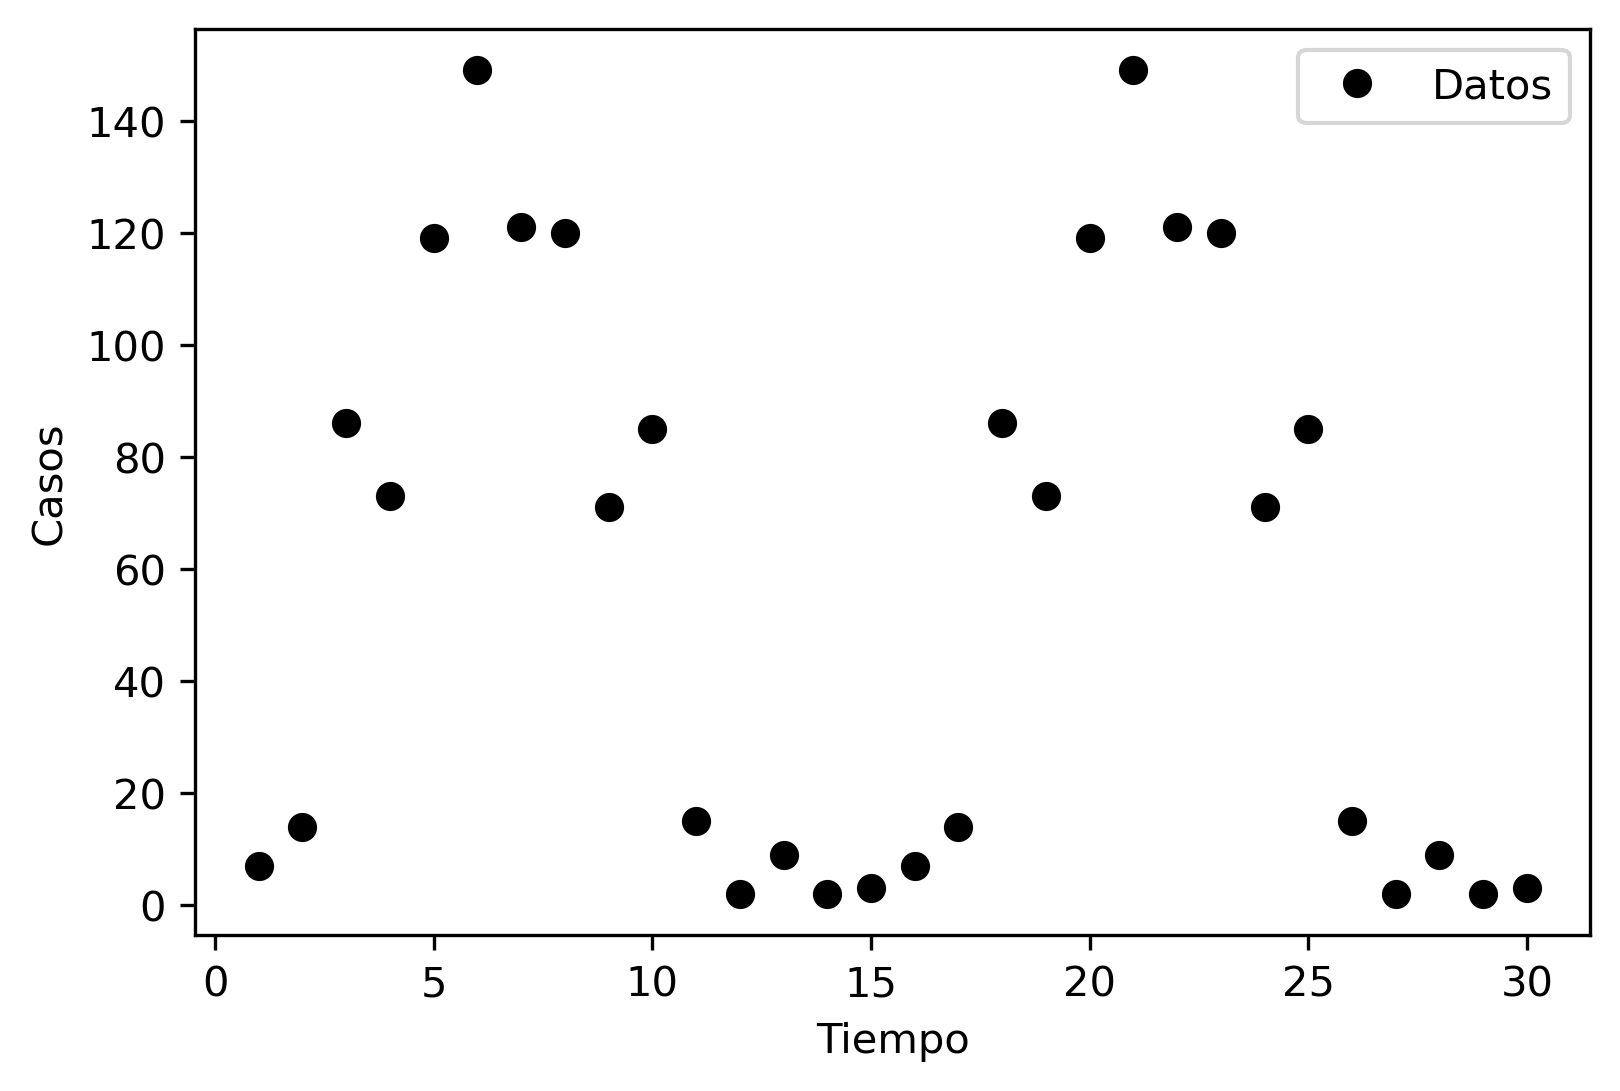

In [43]:
plt.plot(times2, data2, 'ko', linewidth=2, label='Datos')

plt.xlabel('Tiempo')
plt.ylabel('Casos')
plt.legend()
plt.show()

## Intro to AR, MA and ARMA models
- AR models
    - Autoregressive (AR) model
        - AR(1) model:
$$ y_t = a_1 y_{t-1} + \epsilon_t $$
        - AR(2) model:
$$ y_t = a_1 y_{t-1} + a_2 y_{t-2} + \epsilon_t $$
        - AR(p) model:
$$ y_t = a_1 y_{t-1} + a_2 y_{t-2} + \cdots + a_p y_{t-p} + \epsilon_t $$
- MA models
    - Moving Average (MA) model
        - MA(1) model:
$$ y_t = m_1 \epsilon_{t-1} + \epsilon_t $$
        - MA(2) model:
$$ y_t = m_1 \epsilon_{t-1} + m_2 \epsilon_{t-2} + \epsilon_t $$
        - MA(q) model:
$$ y_t = m_1 \epsilon_{t-1} + m_2 \epsilon_{t-2} + \cdots + m_q \epsilon_{t-q} + \epsilon_t $$ 
- ARMA models
    - Autoregressive moving-average (ARMA) model
    - ARMA = AR + MA
        - ARMA(1, 1) model:
$$ y_t = a_1 y_{t-1} + m_1 \epsilon_{t-1} + \epsilon_t $$
        - ARMA(p, q) model:
            - p is order of AR part
            - q is order of MA part

### Model order
Al ajustar y trabajar con modelos AR, MA y ARMA, es muy importante comprender el orden de los modelos. Deberá elegir el orden del modelo al instalarlo. Elegir esto correctamente le dará un modelo de mejor ajuste que hace mejores predicciones. Así que en esta sección practicarás cómo trabajar con el orden del modelo.




In [44]:
from statsmodels.tsa.arima_process import arma_generate_sample


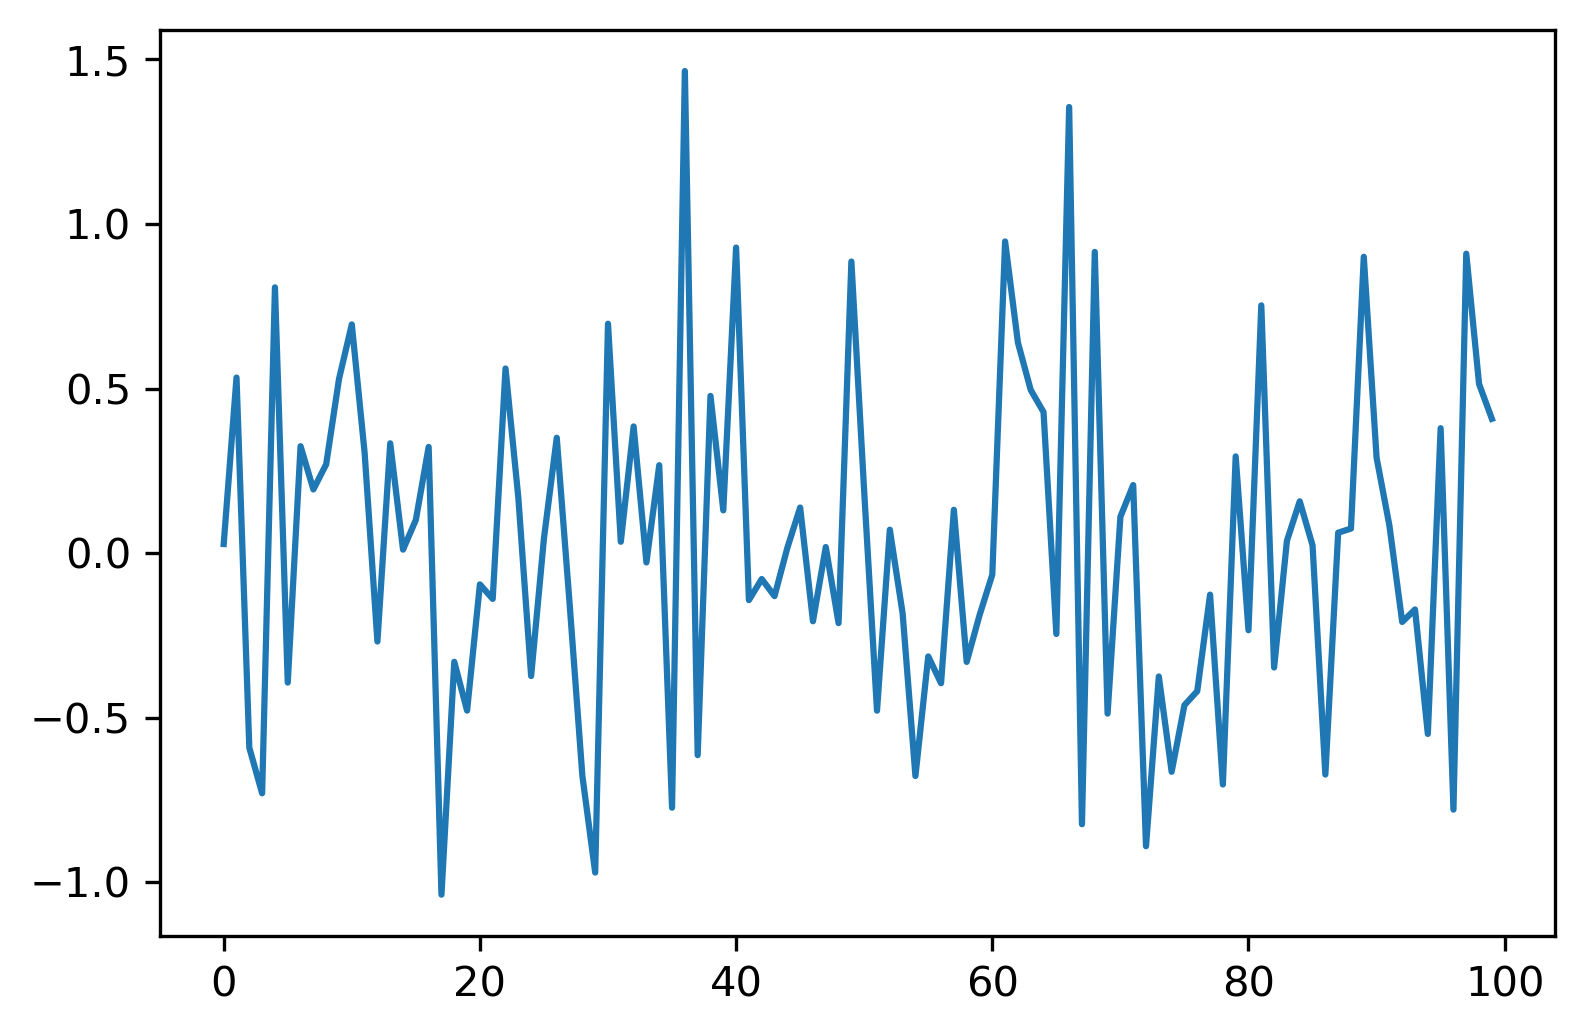

In [45]:
ar_coefs = [1, 0.4, -0.1]
ma_coefs = [1, 0.2]


y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y);

In [46]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 


In [47]:
X = data2
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


predicted=112.536883, expected=119.000000
predicted=123.537873, expected=149.000000
predicted=142.895390, expected=121.000000
predicted=147.613081, expected=120.000000
predicted=104.772195, expected=71.000000
predicted=41.961509, expected=85.000000
predicted=64.960663, expected=15.000000
predicted=28.148752, expected=2.000000
predicted=-16.568369, expected=9.000000
predicted=-15.173804, expected=2.000000
predicted=24.532657, expected=3.000000
Test MSE: 865.183


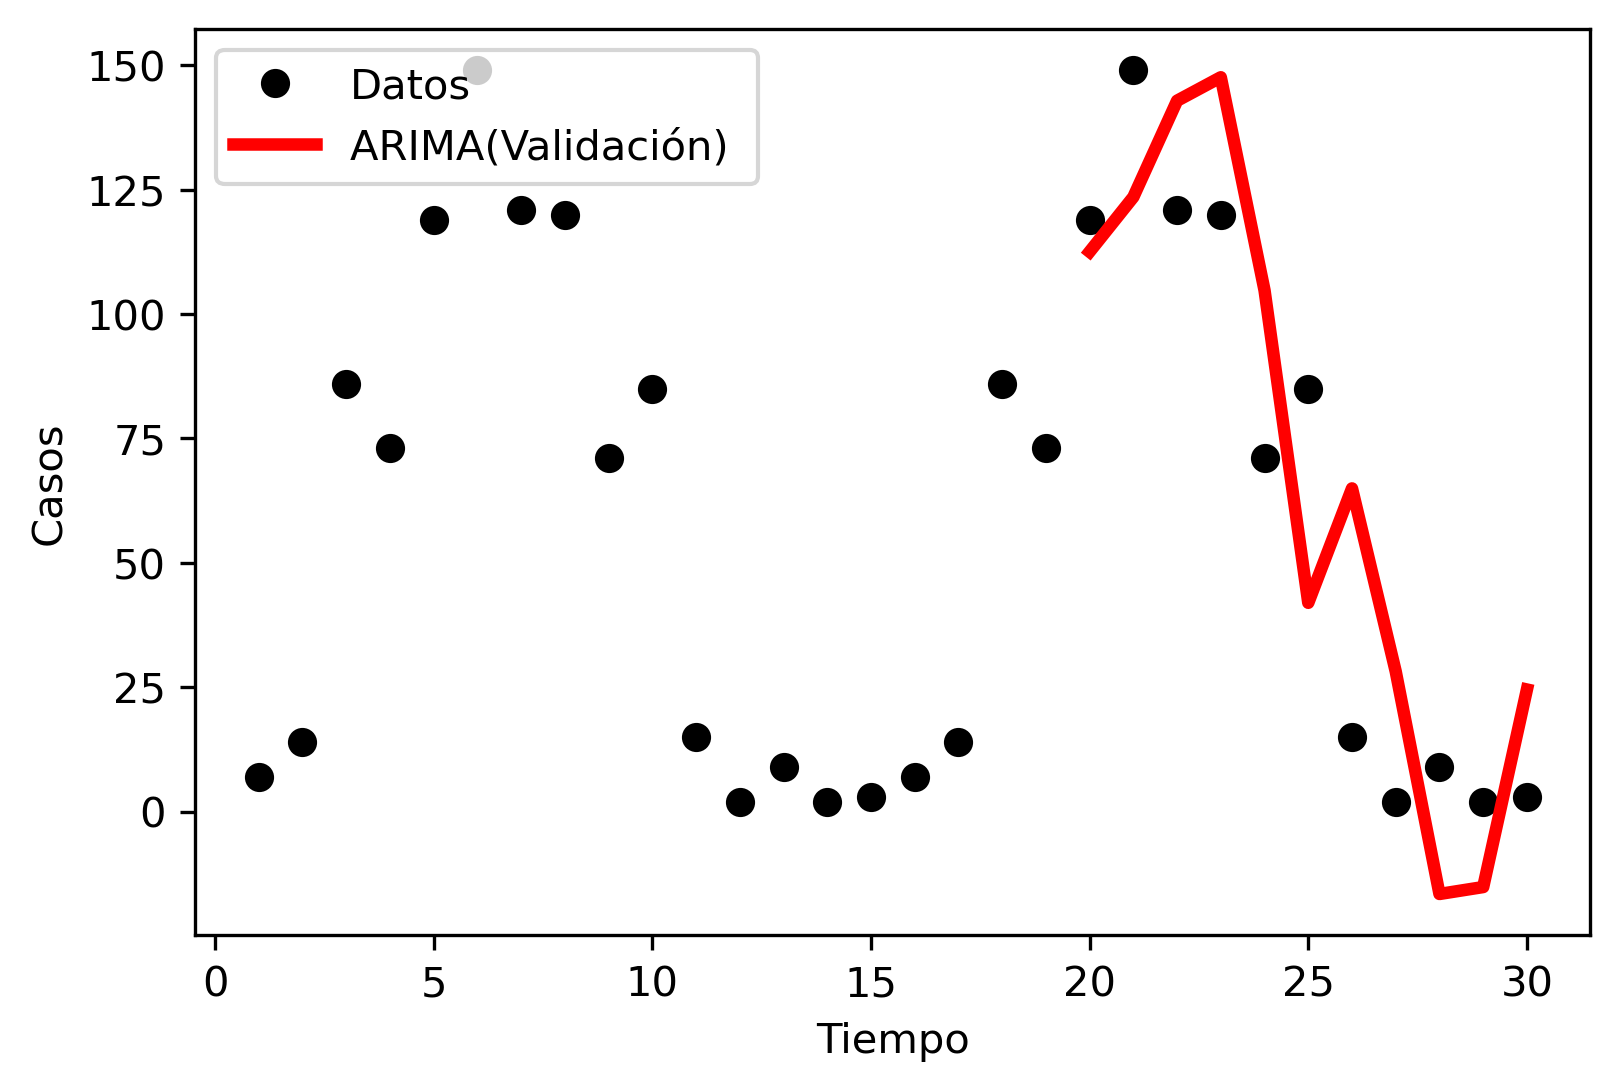

In [48]:
plt.plot(times2,data2, 'ko', linewidth=2, label='Datos')
plt.plot(times2[size:len(X)],predictions,  'r-', linewidth=3, label='ARIMA(Validación) ')

plt.xlabel('Tiempo')
plt.ylabel('Casos')
plt.legend()
plt.show()